# Final Project: Predicting Rain Tomorrow in Australia
This notebook aims to predict whether it will rain tomorrow in Australia using various machine learning models.

## Data Preprocessing

**Adjustments to dataset:**
- dropped first row that has names
- dropped all rows that have a missing target (needed for supervised learning)
- converted RainToday from {Yes, No} to {1,0}
- converted RainTomrrow from {Yes, No} to {1,0}
- broke down the Date into 3 new features Year, Month, and Day
    - dropped the old Date feature
    - dropped the Year and Day
    - implemented cyclical encoding on Month feature
- one-hot encoded locations
    - added the encodings later at the very end
- converted all directive features to degrees (0,360)
- imputed missing categorical features using mode
- imputed missing numerical features using an iterative imputer
- set any row with RainFall more than 1 inch to have a 1 for RainToday
- standardized all features except RainToday and Location

**EDA:**
- printed unique value count, missing value count, and training set description
- count plots for each categorical feature (excluding Date)
- box plots for each numerical feature
    - done before imputation and standardization
    - detected number of outliers for each feature
- heatmap for numerical features (excluding Location)
    - done after imputation and standardization
- box plot data after the imputation and standardization

C:\Users\rafik\AppData\Local\Temp\ipykernel_12304\1046681016.py:58: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train.replace({'Yes': 1, 'No': 0}, inplace=True)
C:\Users\rafik\AppData\Local\Temp\ipykernel_12304\1046681016.py:59: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test.replace({'Yes': 1, 'No': 0}, inplace=True)


No. of Unique values: 
Date             3414
Location           49
MinTemp           386
MaxTemp           499
Rainfall          649
Evaporation       336
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       43
Humidity9am       101
Humidity3pm       101
Pressure9am       541
Pressure3pm       537
Cloud9am           10
Cloud3pm           10
Temp9am           436
Temp3pm           497
RainToday           2
dtype: int64
No. of missing values:
Date                 0
Location             0
MinTemp            510
MaxTemp            261
Rainfall          1116
Evaporation      48781
Sunshine         54326
WindGustDir       7484
WindGustSpeed     7439
WindDir9am        7993
WindDir3pm        3055
WindSpeed9am      1083
WindSpeed3pm      2129
Humidity9am       1428
Humidity3pm       2920
Pressure9am      11243
Pressure3pm      11228
Cloud9am         42992
Cloud3pm         45746
Temp9am            7

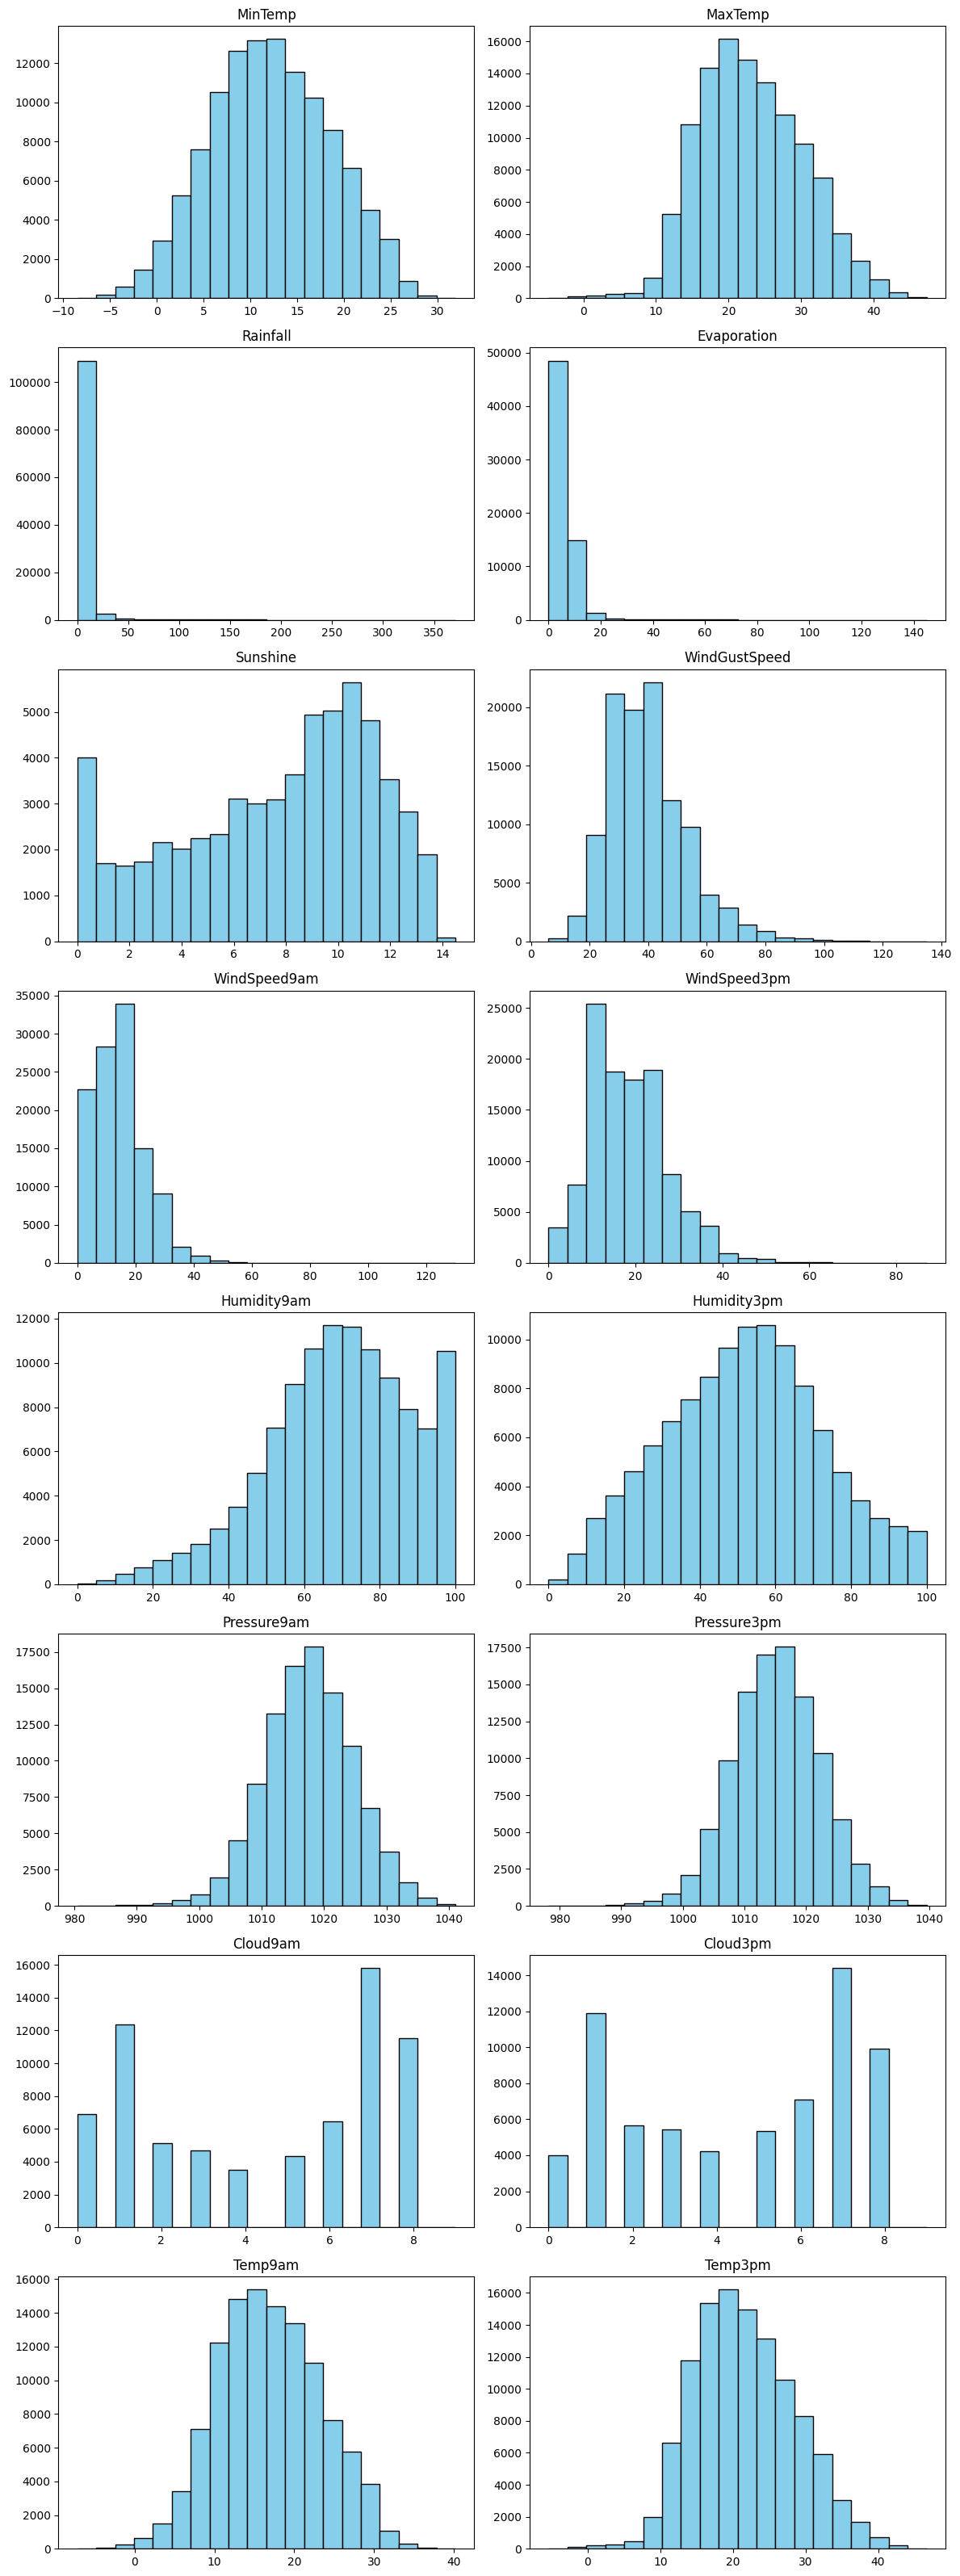

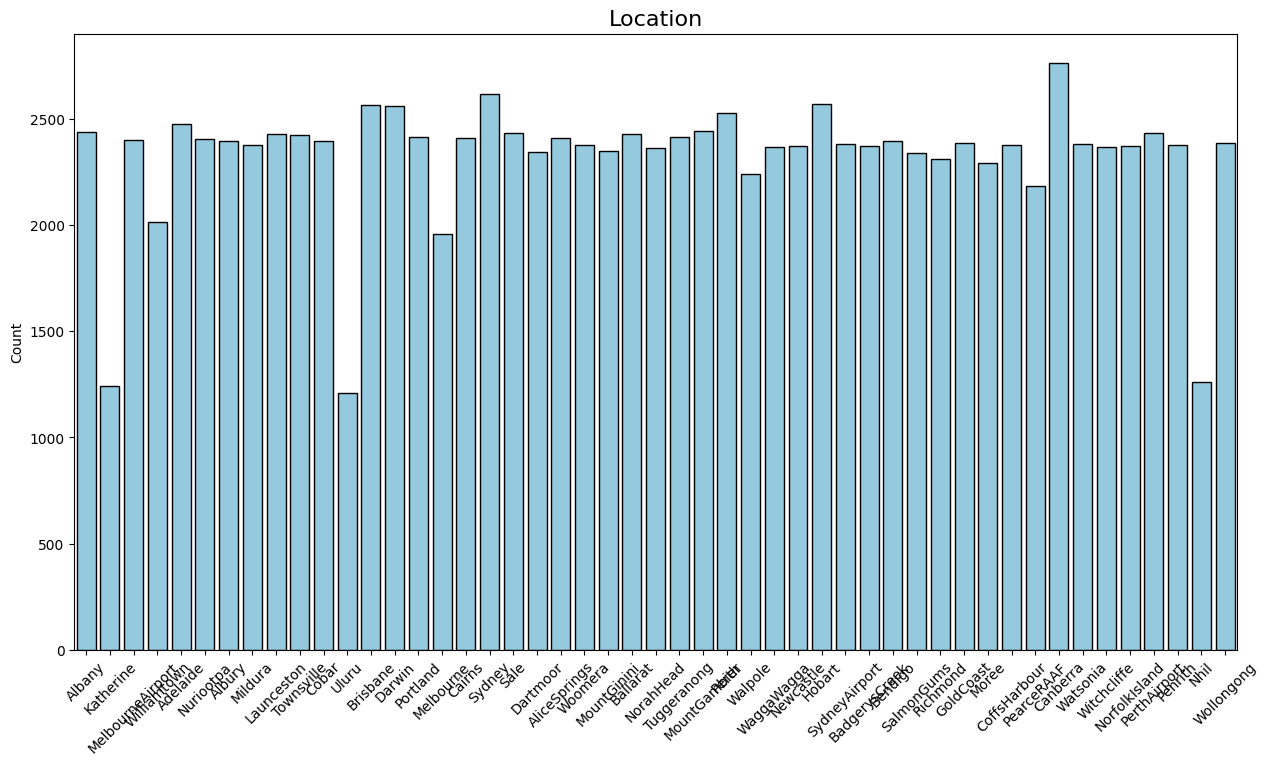

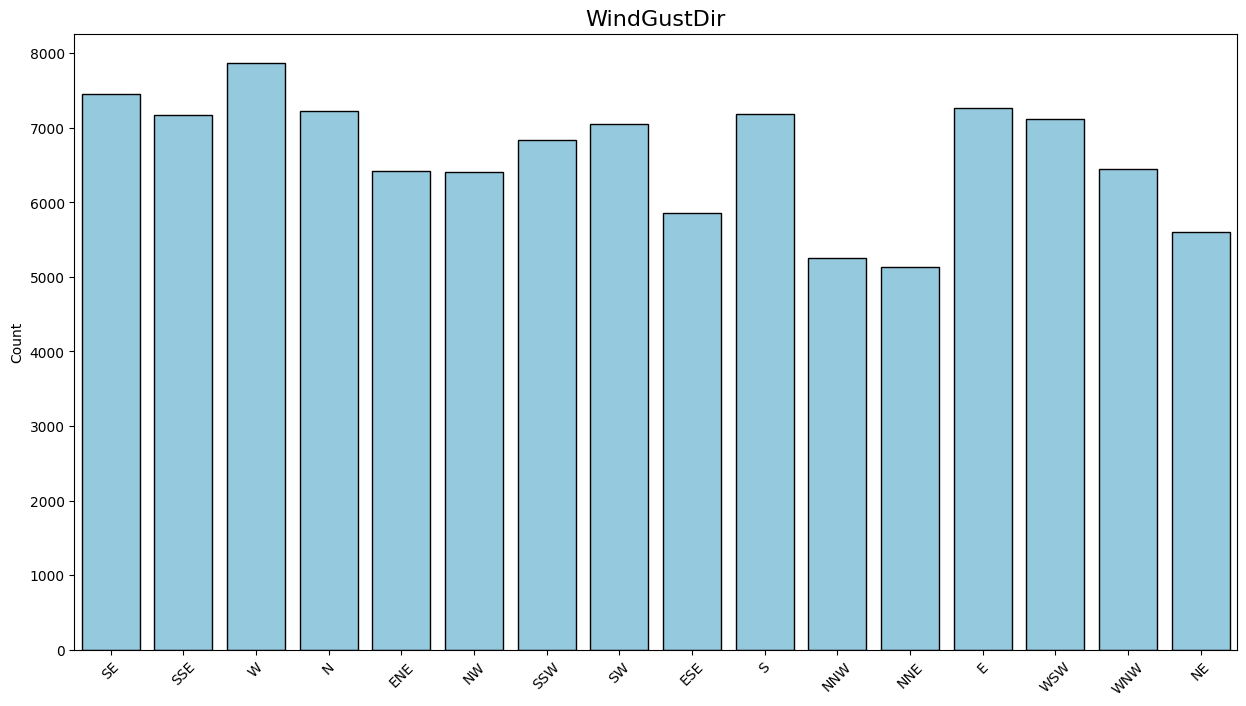

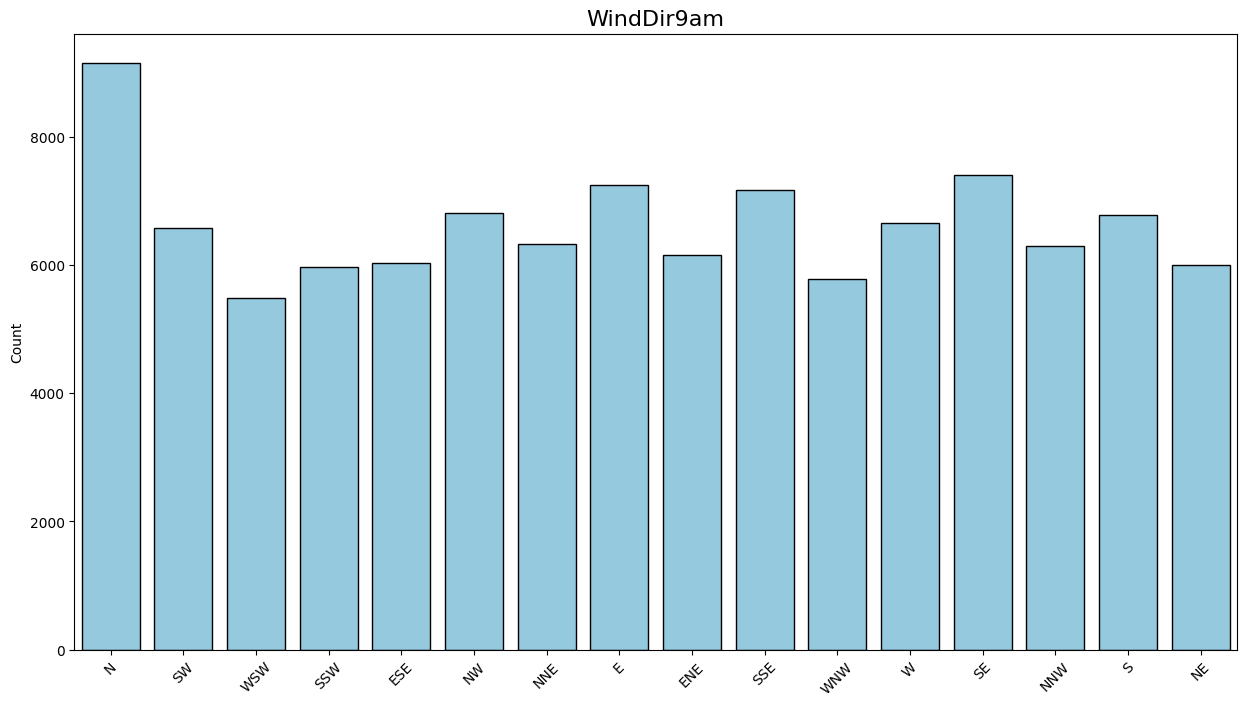

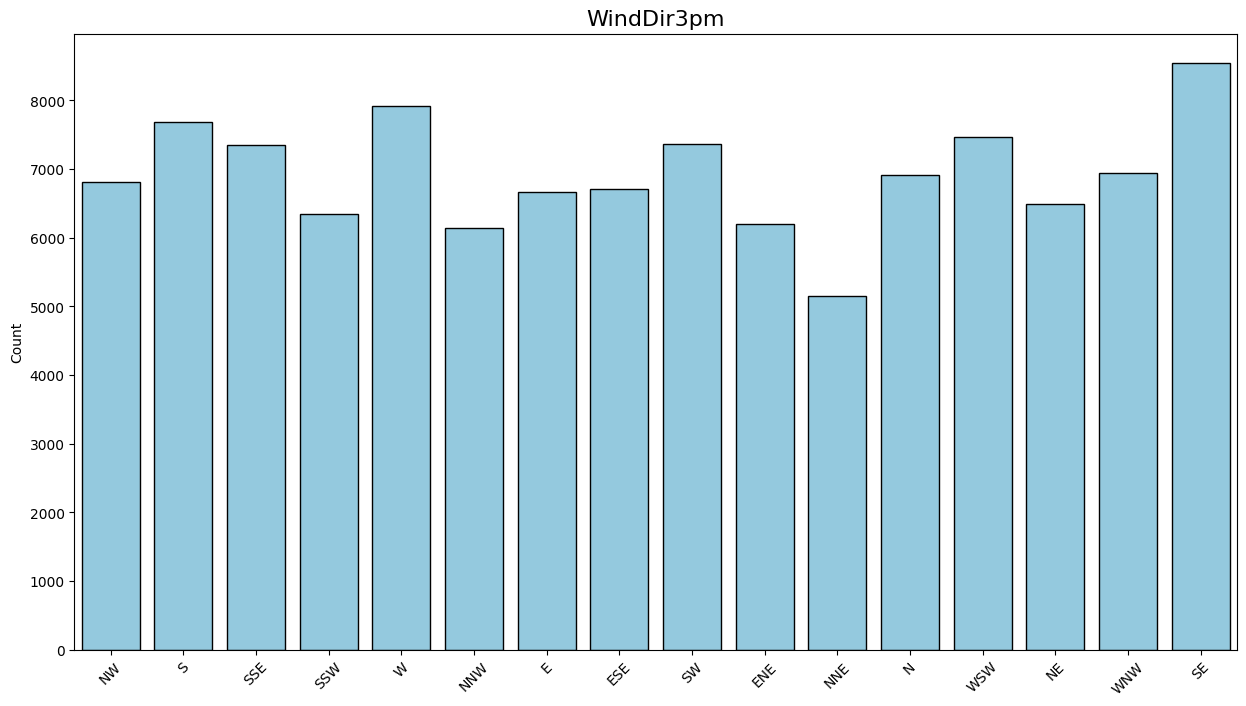

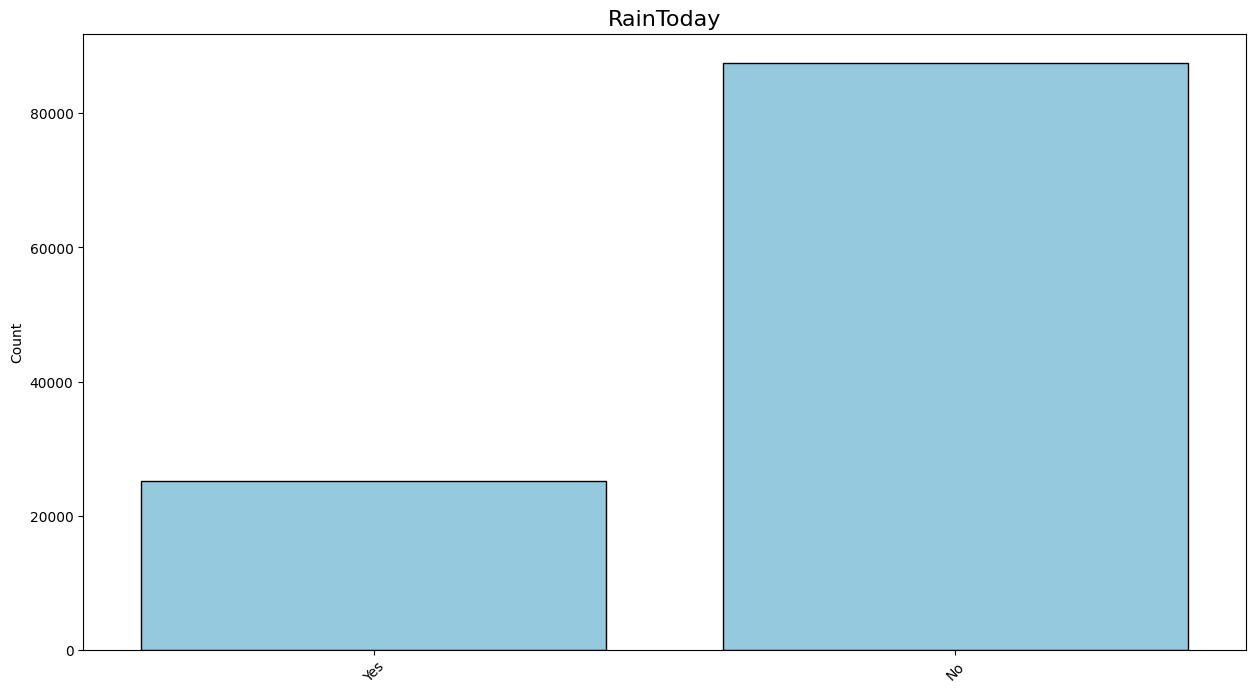

c:\Users\rafik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\rafik\AppData\Local\Temp\ipykernel_12304\1046681016.py:160: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['RainToday'].replace({'Yes': 1, 'No': 0}, inplace=True)
C:\Users\rafik\AppData\Local\Temp\ipykernel_12304\1046681016.py:160: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed 

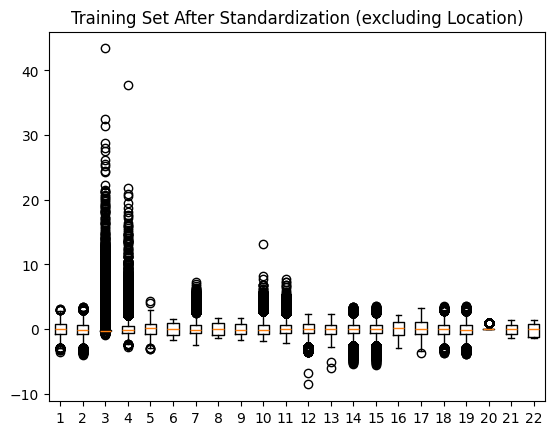

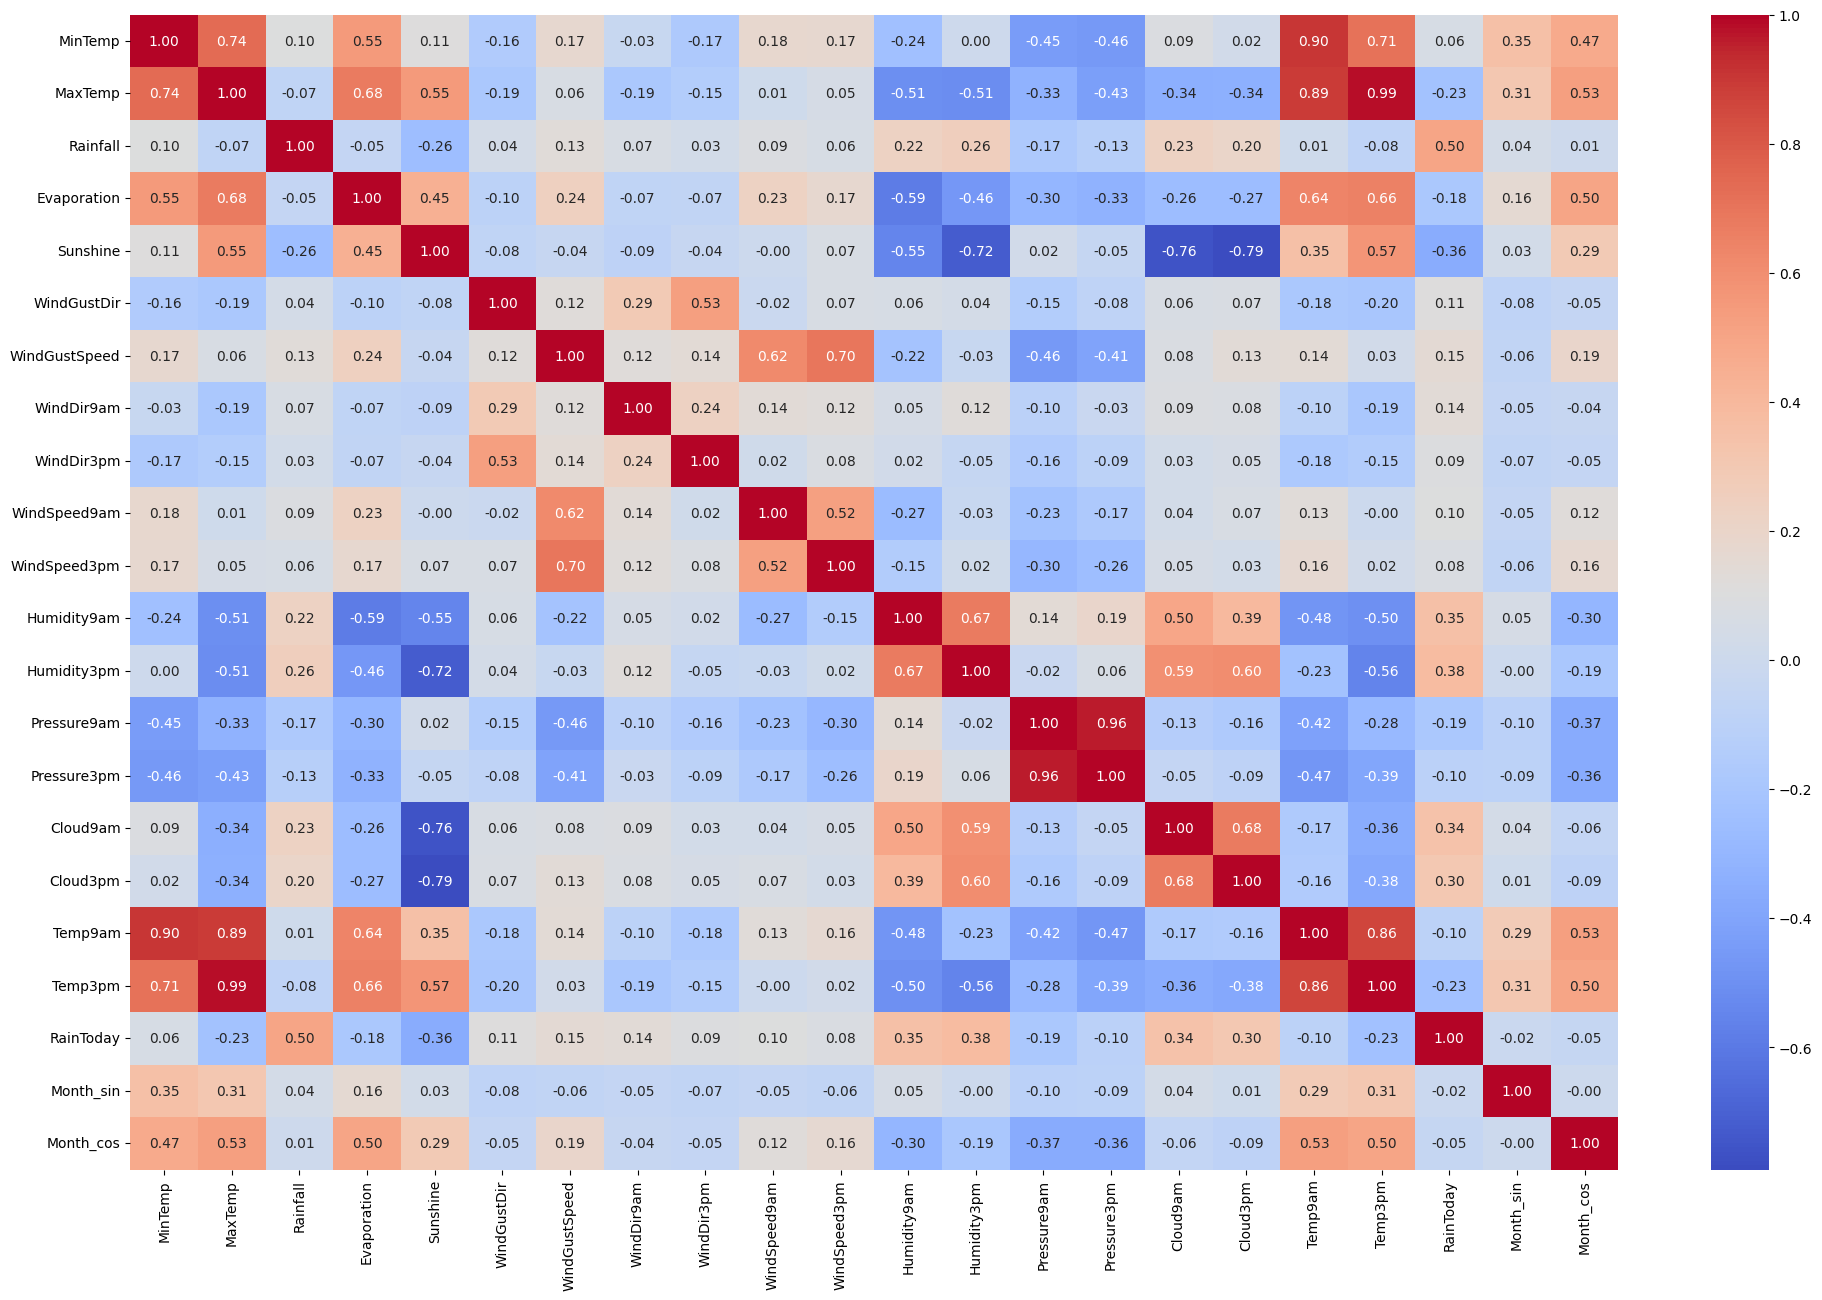

Preprocessed training set description


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
count,1.137610e+05,1.137610e+05,1.137610e+05,1.137610e+05,1.137610e+05,1.137610e+05,1.137610e+05,1.137610e+05,1.137610e+05,1.137610e+05,...,113761.000000,113761.000000,113761.000000,113761.000000,113761.000000,113761.000000,113761.000000,113761.000000,113761.000000,113761.000000
mean,8.856722e-17,6.795567e-16,-2.473387e-17,-1.646426e-16,2.053973e-16,-1.119270e-16,-1.174234e-16,2.223549e-17,-1.250434e-16,-1.197656e-16,...,0.021299,0.021211,0.010628,0.020807,0.019690,0.020921,0.017721,0.020807,0.020965,0.020886
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,0.144380,0.144088,0.102541,0.142738,0.138935,0.143121,0.131937,0.142738,0.143268,0.143003
min,-3.512323e+00,-3.939113e+00,-9.410950e-01,-2.704007e+00,-3.152413e+00,-1.756500e+00,-2.496462e+00,-1.388690e+00,-1.715339e+00,-1.808559e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.166601e-01,-7.483875e-01,-2.795253e-01,-6.696404e-01,-7.056356e-01,-8.616286e-01,-6.777861e-01,-9.777142e-01,-8.130647e-01,-7.901762e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.929971e-02,-8.775273e-02,-2.795253e-01,-1.303585e-01,8.878531e-02,3.324273e-02,-9.650276e-02,4.972411e-02,-1.363591e-01,-1.134592e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.205480e-01,6.993865e-01,-1.853411e-01,4.628515e-01,7.940760e-01,9.281140e-01,6.103599e-01,8.716748e-01,7.659150e-01,5.632578e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.079444e+00,3.384094e+00,4.339841e+01,3.772723e+01,4.351898e+00,1.599268e+00,7.259774e+00,1.693625e+00,1.668189e+00,1.308252e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import IterativeImputer
from sklearn.preprocessing import StandardScaler

''' Read Data '''

X_train = pd.read_csv("weatherAUS_X_train.csv", header=None, delimiter=',', low_memory=False)
y_train = pd.read_csv("weatherAUS_y_train.csv", header=None, delimiter=',', low_memory=False, )
X_test = pd.read_csv("weatherAUS_X_test.csv", header=None, delimiter=',', low_memory=False)
y_test = pd.read_csv("weatherAUS_y_test.csv", header=None, delimiter=',', low_memory=False)

# extracting column names
column_names = X_train.iloc[0].values

# declaring column/target name for each dataset
X_train.columns = column_names
y_train.name = 'RainTomorrow'
X_test.columns = column_names
y_test.name = 'RainTomorrow'

# dropping the first row that holds attribute names from the dataset
X_train = X_train.drop(X_train.index[0])
y_train = y_train.drop(y_train.index[0])
# transforming y_train into a Series
y_train = y_train.iloc[:, 0]

# same as above for test set
X_test = X_test.drop(X_test.index[0])
y_test = y_test.drop(y_test.index[0])
y_test = y_test.iloc[:, 0]


'''  Drop rows that have a missing target '''

# temporarily combining the X (features) and y (target) for a simpler process of dropping
X_train['RainTomorrow'] = y_train
# dropping the rows in X_train that have a missing target variable and resetting index
X_train = X_train.dropna(subset=['RainTomorrow']).reset_index(drop=True)
# dropping the target column from X_train
X_train.drop('RainTomorrow', axis=1, inplace=True)
# dropping the rows in y_train with missing values
y_train = y_train.dropna().reset_index(drop=True)

# same process as above for test set
X_test['RainTomorrow'] = y_test
X_test = X_test.dropna(subset=['RainTomorrow']).reset_index(drop=True)
X_test.drop('RainTomorrow', axis=1, inplace=True)
y_test = y_test.dropna().reset_index(drop=True)


''' Converting targets to binary: 'Yes': 1 & 'No': 0 '''

# converting target to binary values 
y_train.replace({'Yes': 1, 'No': 0}, inplace=True)
y_test.replace({'Yes': 1, 'No': 0}, inplace=True)


''' Initial EDA on training set '''

print('No. of Unique values: ')
print(X_train.nunique())
print('No. of missing values:')
print(X_train.isnull().sum())
print('Training Set Description: ')
X_train.describe()


''' Separate categorical from numerical attributes '''

# list of categorical features in the dataset
categorical_columns = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'] # This is subject to change after encoding

# list of numerical features in the dataset
numerical_columns = [col for col in X_train.columns if col not in categorical_columns] # This is subject to change after encoding

# converting numerical features to type floats
for column in numerical_columns:
    X_train[column] = X_train[column].astype(float)
    X_test[column] = X_test[column].astype(float)


''' Visualize Numerical Features '''

# use histograms to visualize distribution of data

# setting a field to plot multiiple histograms together (2 per row)

# number of rows needed, add 1 for odd numbers
num_rows = (len(numerical_columns) + 1) // 2


# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))
# Adjust vertical spacing between subplots
fig.subplots_adjust(hspace=0.4)  

# Iterate over numerical columns and create histograms
for idx, col in enumerate(numerical_columns):

    # Calculate subplot index
    row_idx = idx // 2 # row index
    col_idx = idx % 2 # column index
    # get the appropariate subplot
    ax = axs[row_idx, col_idx]

    ax.hist(X_train[col], bins=20, color='skyblue', edgecolor='black') # Create histogram on the appropriate subplot
    ax.set_title(col) # setting the title of the subplot
    ax.set_xlabel('Frequency')  # set y-label
    ax.set_xlabel('')  # Remove x-label

# remove last empty subplot if odd number of numerical columns
if len(numerical_columns) % 2 != 0:
    fig.delaxes(axs[-1, -1])

# Adjust layout
plt.tight_layout()
# display
plt.show()

''' Visualize Categorical Features (excluding Date) '''

# use countplots to visualize categorical columns in dataset

# setting a field to plot multiiple histograms together (2 per row)

# exclude Data because it is hard to count plot
categorical_columns.remove('Date')

for col in categorical_columns:
    plt.figure(figsize=(15, 8))  # Set figure size
    sns.countplot(data=X_train, x=col, color='skyblue', edgecolor='black')
    plt.title(col, fontsize=16)  # Set plot title
    plt.xlabel('')  # remove x-label
    plt.ylabel('Count')  # set y-label
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()  # Display plot

# add Date back to my categorical columns
categorical_columns.append('Date')

''' Impute missing numerical values '''

# use the iterative approach to impute numerical missing valules 

# creating an instance of IterativeImputer
imputer = IterativeImputer()
# fitting imputer to training set and transforming it
X_train[numerical_columns] = imputer.fit_transform(X_train[numerical_columns])
# transforming test set using imputer
X_test[numerical_columns] = imputer.transform(X_test[numerical_columns])


''' Encode RainToday '''

# converting the RainToday column to binary values
X_train['RainToday'].replace({'Yes': 1, 'No': 0}, inplace=True)
X_test['RainToday'].replace({'Yes': 1, 'No': 0}, inplace=True)


''' Impute missing RainToday columns (using Rainfall) '''

X_train['RainToday'] = (X_train['Rainfall'] > 1.0).astype(int)
X_test['RainToday'] = (X_test['Rainfall'] > 1.0).astype(int)


''' Encode Date '''

# function created to capture the cyclical aspect of months/days using sin/cos
def encode_cyclical_feature(df, col, period):
    # creates 2 new columns (sin & cosine) 
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / period)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / period)
# extract Month only out of Date
# year and day are going to be dropped

# converting the Date feature into a datetime object
X_train['Date'] = pd.to_datetime(X_train['Date'])
# extracting the month and setting it as a new column
X_train['Month'] = X_train['Date'].dt.month.astype(float)
# encode cyclical feature into month
encode_cyclical_feature(X_train, 'Month', 12)  # Encode month with a period of 12
# drop old Month feature
X_train.drop('Month', axis=1, inplace=True)
# extracting the day and setting it as a new column
# drop old Date feature
X_train.drop('Date', axis=1, inplace=True)

# same process as above for test set 
X_test['Date'] = pd.to_datetime(X_test['Date'])
X_test['Month'] = X_test['Date'].dt.month.astype(float)
encode_cyclical_feature(X_test, 'Month', 12)  # Encode month with a period of 12
X_test.drop('Month', axis=1, inplace=True)
X_test.drop('Date', axis=1, inplace=True)

# updating numerical/categorical columns lists
numerical_columns.append('Month_sin')
numerical_columns.append('Month_cos')
categorical_columns.remove('Date')


''' Encode Location '''

# one-hot encoding location
one_hot_location_train = pd.get_dummies(X_train['Location']).astype(int)
one_hot_location_test = pd.get_dummies(X_test['Location']).astype(int)

# drop old Location feature
X_train.drop('Location', axis=1, inplace=True)
X_test.drop('Location', axis=1, inplace=True)

# will add the one_hot_encodings later at the end after dataset visualization


''' Impute missing directions (using mode) '''

# list of columns that include wind directions
windDir_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

for col in windDir_columns:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
    X_test[col] = X_test[col].fillna(X_test[col].mode()[0])


''' Encode Directions (WindGustDir, WindDir9am, WindDir3pm) '''

# dictionary for converting directions (string) to degrees (float)
directions_to_degrees= {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
    }

for col in windDir_columns:
    # Converting direction (string) feature to degrees (float) using the dictionary
    X_train[col] = X_train[col].map(directions_to_degrees)
    X_test[col] = X_test[col].map(directions_to_degrees)

    # updating numerical/categorical columns lists
    numerical_columns.append(col)
    categorical_columns.remove(col)


''' Standardization '''

# standardize using z-score method to transform the data to have a mean of 0 and standard deviation of 1

# create a StandardScaler object
scaler = StandardScaler()
# copy numerical columns
X_train_copy = X_train[numerical_columns].copy()
# fit the scaler onto the copied columns and transform them
std_X_train_copy = scaler.fit_transform(X_train_copy)
# redeclare the standardized columns to a DataFrame object
X_train_copy = pd.DataFrame(std_X_train_copy, columns=numerical_columns)
# replace the numerical columns with the standardized columns
X_train[numerical_columns] = X_train_copy

# same process as above for test set
X_test_copy = X_test[numerical_columns].copy()
# transform instead of fit_transform to prevent data leakage
std_X_test_copy = scaler.transform(X_test_copy)
X_test_copy = pd.DataFrame(std_X_test_copy, columns=numerical_columns)
X_test[numerical_columns] = X_test_copy


''' Visualize dataset (excluding Location) '''

# Visualize box plot of final dataset (without Location for smoothness)
plt.title('Training Set After Standardization (excluding Location)')
plt.boxplot(X_train)
plt.show()


''' Correlation Matrix '''

# correlation matrix (excluding Location categories)

# setting the size of the matrix
plt.figure(figsize=(24, 15))
# extracting correlation matrix from training set
corr_matrix = X_train.corr()
# visualizing correlation matrix using sns heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# display
plt.show()


''' Add Location features'''

# adding the location encodings to the training set after EDA and imputations
X_train = pd.concat([X_train, one_hot_location_train], axis=1)
X_test= pd.concat([X_test, one_hot_location_test], axis=1)

''' Final dataset description'''

print('Preprocessed training set description')
X_train.describe()


### **PCA reduced datasets**

These PCA reduced datasets will be used only on the models that appear to perform better with less dimensions.

number of principal components 18


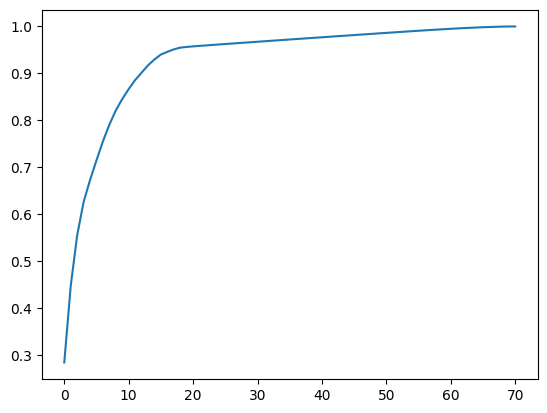

PCA captures 95.1215865975229% of the variance with 18 components.


In [164]:
from sklearn.decomposition import PCA

# creates PCA object
pca = PCA()
# fits PCA to training set
pca.fit(X_train)

# calculates the cumulative explained variance ratio for the variances of all attributes
EVR = np.cumsum(pca.explained_variance_ratio_)
# finds the index where the cumulative explained variance ratio meets the set standard of 95% variance and adds 1 to determine the number of principle components
n_components = np.argmax(EVR >= 0.95) + 1

print('number of principal components', n_components)

# creates PCA object with the discovered number of principle components
pca = PCA(n_components=n_components)

# Visualize PCA's capability
plt.plot(EVR)
plt.show()

print("PCA captures {}% of the variance with {} components.".format(EVR[n_components-1]*100, n_components))

# fits PCA object to training set and transforms datasets
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

## **Model Design and Training:**

Implement various classification algorithms including Decision Trees, Support Vector Machines (SVM), Multi-layer Perceptron (MLP), Logistic Regression, Naïve Bayes and ensemble methods such as Bagging, AdaBoost, Random Forest or XGBoost (You can choose one ensemble method to implement).

### **1a. Decision Tree Classifier**

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# creates tree classifier object
tree_clf = DecisionTreeClassifier()
# fit training set into tree classifier
tree_clf.fit(X_train, y_train)

# predicts target for training set
tree_train_predictions = tree_clf.predict(X_train)
# calculates accuracy of tree classifier on training set
tree_train_score = accuracy_score(y_train, tree_train_predictions)
print(f"Decision Tree Classifier accuracy score on training set: {tree_train_score}")

# predicts target for test set
tree_test_predictions = tree_clf.predict(X_test)
# calculates accuracy of tree classifier on test set
tree_test_score = accuracy_score(y_test, tree_test_predictions)
print(f"Decision Tree Classifier accuracy score on test set {tree_test_score}")

Decision Tree Classifier accuracy score on training set: 0.9999912096412654
Decision Tree Classifier accuracy score on test set 0.7905528981429375


**Initial Accuracy on Decision Tree Classifeir (no PCA):** 99.99% (training) 79..05% (test)

Decision Tree performs better without PCA

#### **1b. Improving Decision Trees (using prunning & max_depth tuning)**

Finding Optimal max_depth

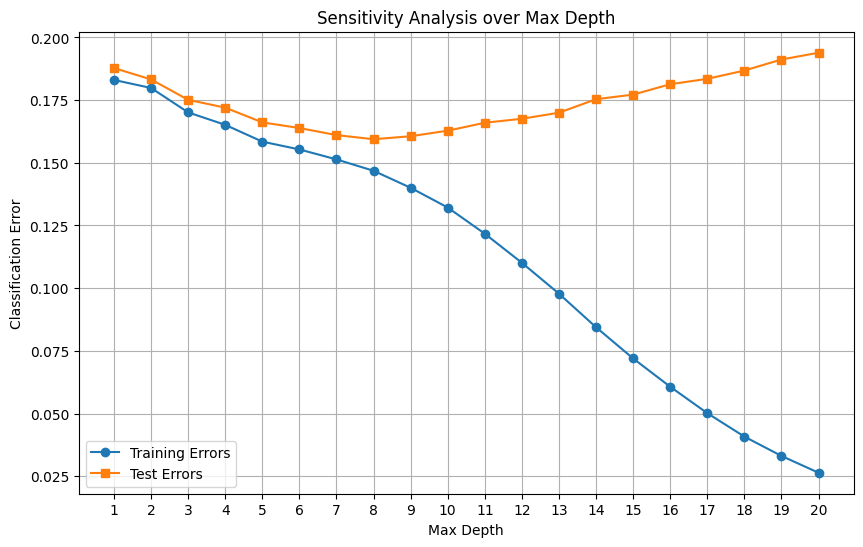

In [12]:
# range of max_depth values to iterate over
max_depth_values = range(1,21)

# lists to hold training/test errors for each max_depth value
training_errors = []
test_errors = []

# variables to hold optimal depth for best accuracy
max_accuracy = optimal_depth = 0

# loop over max_depth values

for max_depth in max_depth_values:

    # creates a DecisionTreeClassifier with the specified max_depth
    tree_clf = DecisionTreeClassifier(max_depth=max_depth)
    # fits the training dataset into the classifier
    tree_clf.fit(X_train, y_train)

    # classifier predicts the classes in the training set 
    tree_train_predict = tree_clf.predict(X_train)
    # calculates error and adds it to the appropriate list
    training_accuracy = accuracy_score(y_train, tree_train_predict)
    training_errors.append(1 - training_accuracy)    

    # classifier predicts the classes in the test set 
    tree_test_predict = tree_clf.predict(X_test)
    # calculates error and adds it to the appropriate list
    test_accuracy = accuracy_score(y_test, tree_test_predict)
    test_errors.append(1 - test_accuracy)

    if test_accuracy > max_accuracy:
        max_accuracy = test_accuracy
        optimal_depth = max_depth


# Visualize

# figure size for plot
plt.figure(figsize=(10, 6))
# plot for training errors
plt.plot(max_depth_values, training_errors, label='Training Errors', marker='o')
# plot for test errors
plt.plot(max_depth_values, test_errors, label='Test Errors', marker='s')

plt.title('Sensitivity Analysis over Max Depth') # setting title
plt.xlabel('Max Depth') # setting x-label
plt.ylabel('Classification Error') # setting y-label
plt.xticks(max_depth_values) # assign x values
plt.grid(True) # add grid line
plt.legend() # add legend
plt.show() # display

Creating a new tree with the optimal max_depth

In [13]:
# creates tree classifier object
tree_clf = DecisionTreeClassifier(max_depth=optimal_depth)
# fit training set to tree classifier
tree_clf.fit(X_train, y_train)

# predicts target for training set
tree_train_predictions = tree_clf.predict(X_train)
# calculates accuracy of tree classifier on training set
tree_train_score = accuracy_score(y_train, tree_train_predictions)
print(f"Decision Tree Classifier accuracy score on training set: {tree_train_score}")

# predicts target for test set
tree_test_predictions = tree_clf.predict(X_test)
# calculates accuracy of tree classifier on test set
tree_test_score = accuracy_score(y_test, tree_test_predictions)
print(f"Decision Tree Classifier accuracy score on test set {tree_test_score}")


Decision Tree Classifier accuracy score on training set: 0.8531834284157136
Decision Tree Classifier accuracy score on test set 0.8403911086100169


**Tree optimized accuracy (after adjusting max_depth):** 85.32% training set ↑↑ & 84.04% on test set ↑↑

THE PART BELOW IS FOR EXPERIMENTAL USE. IT WILL NOT BE EXECUTED NOR IMPLEMENTED IN OPTIMIZED MODEL.

Applying Prunning (won't end up happening due to long list of ccp_alphas requiring heavy computation)

In [14]:
'''
from sklearn.feature_selection import SelectFromModel


#Hyperparameter tuning using GridSearch CV (only reached 70%)
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [2, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Access the best hyperparameters
best_params = grid_search.best_params_

# Evaluate the best model
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(test_accuracy)

    2. prunning (kinda successful) improved performance to 77%. still have to include max_depth=2


# creates an instance of sklearn's DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
# fits the training dataset into the classifier
clf.fit(X_train, y_train)

#You code ends here

# Apply post-pruning with different ccp_alpha values
""" use tree_clf.cost_complexity_pruning_path , then capture ccp_alphas """
#You code starts here

# comptues the pruning path using minimal cost-complexity pruning
ccp_path = clf.cost_complexity_pruning_path(X_train, y_train)
# captures the ccp_alphas list
ccp_alphas = ccp_path.ccp_alphas

#You code ends here

# Iterate over different ccp_alpha values and retrain the decision tree and print out the accuracy of the retrained model
#You code starts here
max_accuracy = 0
optimal_ccp = 0
for ccp_alpha in ccp_alphas:
    # creates a pruned decision tree classifier with the threshold ccp_alpha for pruning
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    # fits the training dataset into the classifier
    clf.fit(X_train, y_train)

    # calculates accuracy of the pruned tree
    accuracy_pruned = accuracy_score(y_test, clf.predict(X_test))
    if accuracy_pruned > max_accuracy:
        optimal_ccp = ccp_alpha

tree_clf = DecisionTreeClassifier(ccp_alpha=optimal_ccp)
tree_clf.fit(X_train, y_train)
accuracy = accuracy_score(y_test, tree_clf.predict(X_test))
print(f"Optimized (prunned) Decision Tree Classifier accuracy: {accuracy}")
    
    3. feature selection (useless) (didn't change anything)

    clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
 
# Select features with importance greater than a threshold
threshold = 0.1  # Adjust as needed
selected_features = X_train.columns[importances > threshold]
 
# Use only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

y_pred_all_features = clf.predict(X_test)

accuracy_all_features = accuracy_score(y_test, y_pred_all_features)
print(f"Accuracy with all features: {accuracy_all_features}")
 
# Make predictions on the test set using the model trained with selected features
y_pred_selected_features = clf.predict(X_test)
 
# Calculate the accuracy of the model with selected features
accuracy_selected_features = accuracy_score(y_test, y_pred_selected_features)
print(f"Accuracy with selected features: {accuracy_selected_features}")

# NOTE: Try engineering features and keep in mind that overfitting is the problem

# creates an instance of DecisionTreeClassifier
temp_clf = DecisionTreeClassifier()
# fits the training dataset into the classifier
temp_clf.fit(X_train_PCA, y_train)

# comptues the pruning path using minimal cost-complexity pruning
ccp_path = temp_clf.cost_complexity_pruning_path(X_train_PCA, y_train)
# captures the ccp_alphas list
ccp_alphas = ccp_path.ccp_alphas

# variables to hold the best ccp_value for best accuracy
max_accuracy = 0
optimal_ccp = 0
print(len(ccp_alphas))
for ccp_alpha in ccp_alphas:
    # creates a pruned decision tree classifier with the threshold ccp_alpha for pruning'
    print(ccp_alpha)
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    # fits the training dataset into the classifier
    clf.fit(X_train_PCA, y_train)

    # calculates accuracy of the pruned tree
    accuracy_pruned = accuracy_score(y_test, clf.predict(X_test_PCA))
    # keeping track of the most effective pruning
    if accuracy_pruned > max_accuracy:
        optimal_ccp = ccp_alpha

# create new tree classifier with best ccp_alpha value
tree_clf = DecisionTreeClassifier(ccp_alpha=optimal_ccp)
# train new tree classifier
tree_clf.fit(X_train_PCA, y_train)
# calculate accuracy
accuracy = accuracy_score(y_test, tree_clf.predict(X_test_PCA))
print(f"Optimized (prunned) Decision Tree Classifier accuracy: {accuracy}")
'''


'\nfrom sklearn.feature_selection import SelectFromModel\n\n\n#Hyperparameter tuning using GridSearch CV (only reached 70%)\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\nparam_grid = {\n    \'max_depth\': [2, 5, 7],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\n# Create the GridSearchCV object\ngrid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)\n\n# Fit the GridSearchCV object to the training data\ngrid_search.fit(X_train, y_train)\n\n# Access the best hyperparameters\nbest_params = grid_search.best_params_\n\n# Evaluate the best model\nbest_model = grid_search.best_estimator_\ntest_accuracy = best_model.score(X_test, y_test)\nprint(test_accuracy)\n\n    2. prunning (kinda successful) improved performance to 77%. still have to include max_depth=2\n\n\n# creates an instance of sklearn\'s DecisionTreeClassifier\nclf = DecisionTreeClassifier(max_depth=2)\n# fits the training dataset into the class

### **2a. Support Vector Machines**


Initial SVM is going to be a linear SVM classifier.

In [41]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

# creates nonlinear SVC instance
svm_classifier = LinearSVC()
# fits training data on svm classifier
svm_classifier.fit(X_train, y_train)

# predictions on training set
training_pred = svm_classifier.predict(X_train)
# calculate accuracy on test set
training_accuracy = accuracy_score(y_train, training_pred)
print("Initiial SVM Accuracy on training set:", training_accuracy)

# predictions on test set
test_pred = svm_classifier.predict(X_test)
# calculate accuracy on test set
test_accuracy = accuracy_score(y_test, test_pred)
print("Initiial SVM Accuracy on test set:", test_accuracy)

c:\Users\rafik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Initiial SVM Accuracy on training set: 0.8466082400822778
Initiial SVM Accuracy on test set: 0.8451392796848621


c:\Users\rafik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Initial accuracy on linear SVC (no PCA):** 85.07% (training) & 84.89% (test)

**Initial accuracy on linear SVC (with PCA):** 84.66% (training) ↓↓ & 84.51% (test) ↓↓

#### **2b. Improving Support Vector Machines (using nonlinear SVM & hyperparameter tuning)**

Testing a non_linear SVM classifier (with default parameters and radial basis function kernel).

In [108]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

# creates nonlinear SVC instance
nonlinear_svm = SVC(probability=True)
# fits training data on svm classifier
nonlinear_svm.fit(X_train, y_train)

# predictions on training set
training_pred = nonlinear_svm.predict(X_train)
# calculate accuracy on test set
training_accuracy = accuracy_score(y_train, training_pred)
print("Initiial SVM Accuracy on training set:", training_accuracy)

# predictions on test set
test_pred = nonlinear_svm.predict(X_test)
# calculate accuracy on test set
test_accuracy = accuracy_score(y_test, test_pred)
print("Initiial SVM Accuracy on test set:", test_accuracy)

Initiial SVM Accuracy on training set: 0.8720914900537091
Initiial SVM Accuracy on test set: 0.8604741136747327


**Initial accuracy on non_linear SVC (PCA):** 86.02% (training) ↑↑ & 84.97% (test) ↑↑

**Initial accuracy on non_linear SVC (no PCA):** 87.2% (training) ↑↑ & 86.04% (test) ↑↑

Tuning Kernels for nonlinear SVC

THIS WILL NOT BE EXECUTED IN FINAL NOTEBOOK DUE TO LONG COMPUTATION TIME. optimal_kernel will be manually passed down to new model.

In [111]:
'''
import matplotlib.pyplot as plt

# different kernels to test
kernels = ['poly', 'rbf', 'sigmoid']

# iterate over different kernels
for kernel in kernels:

    # creates nonlinear SVC with specified kernel
    svm_classifier = SVC(kernel=kernel)
    # fits SVC model to training set
    svm_classifier.fit(X_train, y_train)

    # predicts on test set using SVC model
    test_pred = svm_classifier.predict(X_test)
    # calculates test accuracy
    test_accuracy = accuracy_score(y_test, test_pred)

    print("Non-linear SVM accuracy (" + kernel +") on test set:" , test_accuracy)

# Optimal kernel
optimal_kernel = kernels[test_accuracies.index(max(test_accuracies))]
print("Optimal kernel based on test accuracy:", optimal_kernel)
'''

'\nimport matplotlib.pyplot as plt\n\n# different kernels to test\nkernels = [\'poly\', \'rbf\', \'sigmoid\']\n\n# iterate over different kernels\nfor kernel in kernels:\n\n    # creates nonlinear SVC with specified kernel\n    svm_classifier = SVC(kernel=kernel)\n    # fits SVC model to training set\n    svm_classifier.fit(X_train, y_train)\n\n    # predicts on test set using SVC model\n    test_pred = svm_classifier.predict(X_test)\n    # calculates test accuracy\n    test_accuracy = accuracy_score(y_test, test_pred)\n\n    print("Non-linear SVM accuracy (" + kernel +") on test set:" , test_accuracy)\n\n# Optimal kernel\noptimal_kernel = kernels[test_accuracies.index(max(test_accuracies))]\nprint("Optimal kernel based on test accuracy:", optimal_kernel)\n'

Hyperparameter tuning (parameter grid has been reduced due to heavy computation)

This part will not be executed in the final notebook due to long computation, however, parameters were manually recorded passed down to the optimized model.

In [42]:
''' 
from sklearn.model_selection import GridSearchCV

# parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
# initialziing an SVC instance with optimal kernel
svm_classifier = SVC(kernel=optimal_kernel)

# initializing a GridSearch instance for hyperparameter tuning
grid_search = GridSearchCV(svm_classifier, param_grid=param_grid) 
# fitting the training set onto GridSearchCV object
grid_search.fit(X_train, y_train)

# determining best parameters
print("The best hyperparameters:", grid_search.best_params_)
'''

Creating a new SVM model with the parameters (kernel='poly', C=10, gamma=0.001) obtained from previous steps.

Also, doing oversampling to handle class imbalance for this model.

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

optimal_kernel = 'rbf'

# create optimal SVM model with best parameters
svm_classifier = SVC(kernel=optimal_kernel, C=10, gamma=0.001)
# fitting the training set onto the optimized svm classifier
svm_classifier.fit(X_train, y_train)

# predections on test set
predections = svm_classifier.predict(X_test)
# calculate accuracy on test set
print('accuracay =', accuracy_score(y_test, predections))

accuracay = 0.8458427124366911


**SVM with kernel = rbf, C= 10, gamma = 0.001:** 84.58% on test set ↓↓

### **3a. Multi-layer Perceptron (MLP)**

defining functions for MLP model

In [148]:
%matplotlib inline
np.random.seed(1)

# sigmoid activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# ReLu activation function
def relu(x):    
    return np.maximum(0,x)

# get sizes of the input and output layers
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_y -- the size of the output layer
    """
    # number of columns 
    n_x = len(X)
    # number of targets
    n_y = len(Y)

    return (n_x, n_y)

# intialize weights and biases 
def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in the network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
    """
    
    # intialzing random seed
    np.random.seed(3)
    # initialzing parmater dictionary
    parameters = {}
    # number of layers in the network
    L = len(layer_dims)

    # for loop to initialize the weights and biases for all layers in the network
    for l in range(1, L):
        # intialize weight with random value 0-1 divided by the root of the size of previous layer
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        # intialize bias with zeros
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data
    parameters -- python dictionary containin parameters
    
    Returns:
    A -- The output of the final activation
    cache -- a dictionary containing the intermediate values
    """

    # dictionary to hold the output values of the activation functions
    cache = {}

    L = len(parameters) // 2  # number of layers in the neural network
    
    # Implement forward propagation for each layer
    for l in range(1, L+1):

        # retrieving weights and biases
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]

        # multiply weight and add bias to each layera
        if l == 1:
            Z = np.dot(W, X) + b
        else:
            Z = np.dot(W, cache['A' + str(l-1)])
        
        # if last layer, use sigmoid activation function
        if l == L:
            cache['A' + str(l)] = sigmoid(Z)
        # all other layers, use ReLu activation function
        else:
            cache['A' + str(l)] = relu(Z)
    
    # the activation output of the last layer
    AL = cache['A' + str(L)]

    return AL, cache


def compute_cost(AL, Y, parameters, lambd):
    """    
    Arguments:
    AL -- The sigmoid output of the last activation
    Y -- true labels
    parameters -- python dictionary containing parameters
    lambd -- hyperparameter for L2_Regularization
    
    Returns:
    cost -- cross-entropy cost given equation
    """
    
    m = Y.shape[1] # number of examples
    
    # Compute the cross-entropy cost

    # epsilon to handle large values
    epsilon = 1e-15
    logprobs = np.add(np.multiply(Y, np.log(AL + epsilon)), np.multiply((1-Y), np.log(1-AL + epsilon)))
    cost = (-1/m)*np.sum(logprobs)

    # if L2-regularization is implemented
    if lambd != 0:
        # number of layers
        L = len(parameters) // 2
        # squared weights for L2_regularization
        squared_weights = 0
        for l in range(1, L+1):
            # squared the weights and sum the values up for l layer
            squared_weights += np.sum(np.square(parameters['W' + str(l)]))
        # apply lambda hyperparameter to squared weights
        L2_regularization_cost = (1/m)*(lambd/2)* squared_weights
        # add regularization penalty to cost
        cost += L2_regularization_cost

    # makes sure cost is the dimension we expect 
    cost = np.squeeze(cost)     
                                    
    return cost


def backward_propagation(parameters, cache, X, Y, lambd):
    """
    Arguments:
    parameters -- python dictionary containing parameters 
    cache -- a dictionary containing intermediate values
    X -- input data
    Y -- true labels
    lambd -- hyperparameter for L2-Regularization
    
    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """

    # number of examples
    m = X.shape[1]
    # numebr of layers
    L = len(parameters) // 2

    # dictionary to hold gradients
    grads = {}

    # backward propagation for each layer
    for l in range(L, 0, -1):
        # calculate the gradients of each layer
        if l == L:
            Z = np.subtract(cache['A' + str(l)], Y)
            grads['dW' + str(l)] = 1./m * (np.dot(Z, cache['A' + str(l-1)].T)) + (lambd/m)*parameters['W' + str(l)]
            grads['db' + str(l)] = 1./m * np.sum(Z, axis=1, keepdims = True)
        else:
            A = np.dot(parameters['W' + str(l+1)].T, Z)
            Z = np.multiply(A, np.int64(cache['A' +str(l)] > 0))
            if l == 1:
                grads['dW' + str(l)] = 1./m * np.dot(Z, X.T) + (lambd/m)*parameters['W' + str(l)]
            else:
                grads['dW' + str(l)] = 1./m * np.dot(Z, cache['A' + str(l-1)].T) + (lambd/m)*parameters['W' + str(l)]
            grads['db' + str(l)] = 1./m * np.sum(Z, axis=1, keepdims = True)
    
    return grads


def update_parameters(parameters, grads, learning_rate):
    """    
    Arguments:
    parameters -- python dictionary containing parameters
    grads -- python dictionary containing gradients for each parameters
    learning_rate -- the learning rate -- hyperparameter
    
    Returns:
    parameters -- python dictionary containing updated parameters 
    """
    
    # number of layers in the neural networks
    L = len(parameters) // 2 

    # Update rule for each parameter using the gardients and applying the learning_rate
    for l in range(1, L+1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)]
        
    return parameters


def nn_model(X, Y, n_l, n_h, learning_rate, lambd, num_iterations=10000):
    """
    Arguments:
    X -- input data 
    Y -- true labels
    n_l -- number of hidden layers
    n_h -- size of the hidden layers
    learning_rate -- hyperparameter for updating the parameters
    lambd -- L2-Regularization hyperparameter
    num_iterations -- Number of iterations in gradient descent loop
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    # initialize seed for np.random
    np.random.seed(3)

    # getting input data and label size
    (n_x, n_y) = layer_sizes(X, Y)

    # list including the sizes of each layer
    layer_dims = []    
    # add the size of the input data
    layer_dims.append(n_x)
    # add the size of each hidden layer
    for i in range(0, n_l):
        layer_dims.append(n_h)
    # add the size of the output layer
    layer_dims.append(n_y)

    
    # Initialize and retrieve parameters 
    parameters = initialize_parameters(layer_dims)
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
    
        # Forward propagation
        AL, cache = forward_propagation(X, parameters)
        # Cost function
        cost = compute_cost(AL, Y, parameters, lambd=lambd)
        # Backpropagation
        grads = backward_propagation(parameters, cache, X, Y, lambd=lambd)
        # Gradient descent parameter update
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 500 iterations
        if i % 500 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    return parameters


def predict(parameters, X):
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    AL = forward_propagation(X, parameters)[0]
    predictions = (AL > 0.5)
    predictions = predictions.reshape(-1)
    
    return predictions

def predict_proba(parameters, X):
    # Computes probabilities using forward propagation.
    AL = forward_propagation(X, parameters)[0]
    AL = AL.reshape(-1)
    softmax_AL = []

    for x in AL:
        softmax_AL.append([1-x, x])
        
    return np.array(softmax_AL)

def calculate_accuracy(predictions, Y):
    # add the number of correct predictions and divide by number of instances 
    return np.sum(predictions == Y)/Y.size

Initial MLP model (with 1 hidden layers, 3 neurons, learning rate = 0.7, no regularization, 10,000 iterations).

Activation functions: ReLu -> ReLu -> sigmoid

In [98]:
# transposing X_train and y_train
X_train_transposed = X_train.T

y_reshaped = y_train.values.reshape(-1, 1)
y_train_transposed = y_reshaped.transpose()

# transposing X_test and y_test
X_test_transposed = X_test.T

y_reshaped = y_test.values.reshape(-1,1)
y_test_transposed = y_reshaped.T


# create model and retrieve parameters
# intial model has 1 hidden layer, 3 neurons, 0.7 learning_rate, and no regularization using 10,000 iterations
parameters = nn_model(X_train_transposed, y_train_transposed, 1, 3, 0.7, 0)

# predict on training set
training_predictions = predict(parameters, X_train_transposed)
# calculate accuracy on training set
print(f"Accuracy on training set: {calculate_accuracy(training_predictions, y_train_transposed)}")

# predict on test set
test_predictions = predict(parameters, X_test_transposed)
# calculate accuracy on test set
print(f"Accuracy on test set: {calculate_accuracy(test_predictions, y_test_transposed)}")


Cost after iteration 0: 0.764477
Cost after iteration 500: 0.343500
Cost after iteration 1000: 0.340882
Cost after iteration 1500: 0.339168
Cost after iteration 2000: 0.338898
Cost after iteration 2500: 0.337787
Cost after iteration 3000: 0.337347
Cost after iteration 3500: 0.336961
Cost after iteration 4000: 0.336547
Cost after iteration 4500: 0.336037
Cost after iteration 5000: 0.335590
Cost after iteration 5500: 0.335341
Cost after iteration 6000: 0.335254
Cost after iteration 6500: 0.334442
Cost after iteration 7000: 0.334421
Cost after iteration 7500: 0.333903
Cost after iteration 8000: 0.333833
Cost after iteration 8500: 0.333931
Cost after iteration 9000: 0.333918
Cost after iteration 9500: 0.333712
Accuracy on training set: 0.853789963168397
Accuracy on test set: 0.8497819358469331


**Initial MLP model accuracy (no PCA):** 85.37% on training set & 84.97% on test set

#### **3b. Improving Multi-layer Percepton (using hyperparameter tuning & regularization)**

Regularization techniques implemented in functions cell above

THIS HYPERPARAMETER TUNING WILL NOT BE EXECUTED IN FINAL NOTEBOOK DUE TO HEAVY COMPUTATION. 

Parameters will be manually observed and recorded.

In [99]:
'''
# library to create combinations of hyperparameters
from itertools import product
# library to split training set into training and validation sets
from sklearn.model_selection import train_test_split

# parmaeters that will be used for the parameter grid
num_layers = [1, 2, 3] # number of hidden layers
num_neurons = [10, 12, 14, 16, 18, 20] # number of neurons per hidden layer
lr = [0.1, 0.3, 0.5, 0.7, 1] # learning rate
lambd = [0.1, 0.5, 1.0] # lambda for L2-Regularization

# Create a grid of hyperparameter combinations
hyperparameter_grid = product(num_layers, num_neurons, lr, lambd)

# variables to hold best accuracy using best hyperparameters
best_accuracy = 0
best_hyperparameters = None

# splitting training set into 80% training and 20% validation
X_trainy, X_val, y_trainy, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# transposing training sets
X_trainy = X_trainy.T
y_trainy = y_trainy.values.reshape(-1,1)
y_trainy = y_trainy.T

# transposing validation sets
X_val = X_val.T
y_val = y_val.values.reshape(-1,1)
y_val = y_val.T

# Iterate through each hyperparameter combination
for num_layers, num_neurons, lr, lambd in hyperparameter_grid:

    # create model with specified hyperparameters and only 5000 iterations to reduce computation
    parameters = nn_model(X_trainy, y_trainy, num_layers, num_neurons, lr, lambd, num_iterations=5000)    

    # Validate the model on the validation set
    predections = predict(parameters, X_val)

    # Calculate accuracy
    validation_accuracy = calculate_accuracy(predections, y_val)

    print(f"Accuracy on model (layers = {num_layers}, neurons = {num_neurons}, learning_rate = {lr}, lambd = {lambd}): {validation_accuracy}")
    
    # Update best model if current model performs better
    if validation_accuracy > best_accuracy:
        best_accuracy = validation_accuracy
        best_hyperparameters = (num_layers, num_neurons, lr, lambd)
'''


'\n# library to create combinations of hyperparameters\nfrom itertools import product\n# library to split training set into training and validation sets\nfrom sklearn.model_selection import train_test_split\n\n# parmaeters that will be used for the parameter grid\nnum_layers = [1, 2, 3] # number of hidden layers\nnum_neurons = [10, 12, 14, 16, 18, 20] # number of neurons per hidden layer\nlr = [0.1, 0.3, 0.5, 0.7, 1] # learning rate\nlambd = [0.1, 0.5, 1.0] # lambda for L2-Regularization\n\n# Create a grid of hyperparameter combinations\nhyperparameter_grid = product(num_layers, num_neurons, lr, lambd)\n\n# variables to hold best accuracy using best hyperparameters\nbest_accuracy = 0\nbest_hyperparameters = None\n\n# splitting training set into 80% training and 20% validation\nX_trainy, X_val, y_trainy, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)\n\n# transposing training sets\nX_trainy = X_trainy.T\ny_trainy = y_trainy.values.reshape(-1,1)\ny_trainy = y_

Creating new model with the best hyperparameters obtained from previous steps.

Those parameters will be manually passed down since the hyperparameter tuning will not be executed again (heavy computation).

hidden layers = 1, neurons = 12, leraning rate = 0.7, lambda = 0.1, iterations = 10000

In [150]:
# create new model and retrieve parameters
parameters = nn_model(X_train_transposed, y_train_transposed, 1, 12, 0.7, 0.1, 10000)

# predict on training set
training_predictions = predict(parameters, X_train_transposed)
# calculate accuracy on training set
print(f"Accuracy on training set: {calculate_accuracy(training_predictions, y_train_transposed)}")

# predict on test set
test_predictions = predict(parameters, X_test_transposed)
# calculate accuracy on test set
print(f"Accuracy on test set: {calculate_accuracy(test_predictions, y_test_transposed)}")

Cost after iteration 0: 0.721123
Cost after iteration 500: 0.334698
Cost after iteration 1000: 0.328989
Cost after iteration 1500: 0.324603
Cost after iteration 2000: 0.323177
Cost after iteration 2500: 0.321070
Cost after iteration 3000: 0.319243
Cost after iteration 3500: 0.317924
Cost after iteration 4000: 0.316798
Cost after iteration 4500: 0.315724
Cost after iteration 5000: 0.314861
Cost after iteration 5500: 0.314146
Cost after iteration 6000: 0.313177
Cost after iteration 6500: 0.312345
Cost after iteration 7000: 0.311723
Cost after iteration 7500: 0.311522
Cost after iteration 8000: 0.311126
Cost after iteration 8500: 0.310439
Cost after iteration 9000: 0.310421
Cost after iteration 9500: 0.309884
Accuracy on training set: 0.8665887254858871
Accuracy on test set: 0.8610016882386043


**Optimized MLP accuracy**: 86.1% on test set

### **4a. Logistic Regression**

In [50]:
# import LogisticRegressionCV model from sklearn
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

# Create LogisticRegressionCV object
LR = LogisticRegressionCV()
# fit training set to LR model
LR.fit(X_train, y_train)

# calculate training accuracy
LR_predictions_train = LR.predict(X_train)
print (f"LR Accuracy on training set: {calculate_accuracy(LR_predictions_train, y_train)}")

# calcualte test accuracy
LR_predictions_test = LR.predict(X_test)
print (f"LR Accuracy on test set: {calculate_accuracy(LR_predictions_test, y_test)}")

LR Accuracy on training set: 0.8506693858176352
LR Accuracy on test set: 0.8477419808666291


**Initial LR Accuracay with no PCA sets:** 85.06% (training) 84.77% (test)

**Initial LR Accuracay with PCA sets :** 84.3% (training) 84.06% (test) ↓↓

#### **4b. Improving Logistic Regression (using feature selection or hyperparameter tuning)**

Multiple approaches were implemented below to improve Logistic Regression performance, but they were not effective at improving accuracy.

Feature Selection (not effective)

In [33]:
# importing RFE from sklearn for reducing features
from sklearn.feature_selection import RFE

# creating an RFE object that selects 15 features
model = RFE(LR, n_features_to_select=15)

# new training set with reduced features from RFE
X_train_selected = model.fit_transform(X_train, y_train)
# new test set with reduced features from RFE
X_test_selected = model.transform(X_test)

# train the Logistic Regression model using the new training set
LR.fit(X_train_selected, y_train)

# calculate training accuracy
LR_predictions_train = LR.predict(X_train_selected)
print (f"LR Accuracy on training set: {calculate_accuracy(LR_predictions_train, y_train)}")

# calcualte test accuracy
LR_predictions_test = LR.predict(X_test_selected)
print (f"LR Accuracy on test set: {calculate_accuracy(LR_predictions_test, y_test)}")

LR Accuracy on training set: 0.8485069575689383
LR Accuracy on test set: 0.8455965109735509


Feature Selection is not very helpful: 84.5% on test set

Hyperparameter tuning

THIS PART WILL BE SKIPPED DUE TO HEAVY COMPUTATION.

In [51]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],   # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],      # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300, 400, 500, 1000],  # Maximum number of iterations for optimization
    'tol': [1e-4, 1e-3, 1e-2],                # Tolerance for stopping criteria
    'class_weight': [None, 'balanced'],       # Weights associated with classes in the form {class_label: weight}
    'warm_start': [False, True]               # Whether to reuse the solution of the previous call to fit as initialization
}

# Create a Logistic Regression model
logistic_regression = LogisticRegressionCV()

# Create a GridSearchCV object with the parameter grid and 10-k fold cross validation
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=10, scoring='accuracy', verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)  # Replace X and y with your dataset

# calculate accuracy on test set
LR_predictions_test = grid_search.predict(X_test)
print (f"LR Accuracy on test set: {calculate_accuracy(LR_predictions_test, y_test)}")
'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.linear_model import LogisticRegressionCV\n\n# Define the parameter grid\nparam_grid = {\n    \'penalty\': [\'l1\', \'l2\', \'elasticnet\'],   # Regularization penalty\n    \'C\': [0.001, 0.01, 0.1, 1, 10, 100],      # Inverse of regularization strength\n    \'solver\': [\'newton-cg\', \'lbfgs\', \'liblinear\', \'sag\', \'saga\'],  # Algorithm to use in the optimization problem\n    \'max_iter\': [100, 200, 300, 400, 500, 1000],  # Maximum number of iterations for optimization\n    \'tol\': [1e-4, 1e-3, 1e-2],                # Tolerance for stopping criteria\n    \'class_weight\': [None, \'balanced\'],       # Weights associated with classes in the form {class_label: weight}\n    \'warm_start\': [False, True]               # Whether to reuse the solution of the previous call to fit as initialization\n}\n\n# Create a Logistic Regression model\nlogistic_regression = LogisticRegres

Hyperparameter tuning did not improve model accuracy. It only achieved 84.76% on test set.

### **5a. Naive Bayes**

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# creating a GuassianNB instance
NB_classifier = GaussianNB()
# fitting the training dataset into the NB classifier
NB_classifier.fit(X_train,y_train)

# evaluating NB classifier's prediction on training set
NB_prediction_train = NB_classifier.predict(X_train)
# calculating training accuracy
accuracy_train = accuracy_score(y_train, NB_prediction_train)
print("Accuracy of Naive Bayes Classifier on training set", accuracy_train)

# evaluating NB classifier's prediction on test set
NB_prediction_test = NB_classifier.predict(X_test)
# calculating test accuracy
accuracy_test = accuracy_score(y_test, NB_prediction_test)
print("Accuracy of Naive Bayes Classifier on test set:", accuracy_test)

Accuracy of Naive Bayes Classifier on training set 0.6673025026151317
Accuracy of Naive Bayes Classifier on test set: 0.669843837929094


**Initial NB accuracy (no PCA):** 66.73% (training) 66.98% (test)

#### **5b. Improving Naive Bayes (by dropping correlated features)**

dropping the 9am features that are correlated with the 3 pm features and a few more according to the correlation matrix calculated in preprocessing step.

In [154]:
'''
dropping some correlated features
'''

# dropping correlated features (dropping most of the 9am features since they obviously correlate to the 3pm features)
X_train_selected = X_train.drop(columns=['MinTemp', 'WindDir9am',  'WindSpeed9am', 'Humidity9am', 'Pressure9am', 'Cloud9am', 'Temp9am', 'RainToday'])
X_test_selected = X_test.drop(columns=['MinTemp', 'WindDir9am',  'WindSpeed9am', 'Humidity9am', 'Pressure9am', 'Cloud9am', 'Temp9am', 'RainToday'])

# applying PCA to remaining features only
# creating instance of PCA
pca = PCA()

# fits pca to reduced training set
pca.fit(X_train_selected)

# calculates the cumulative explained variance ratio for the variances of all selected attributes
EVR = np.cumsum(pca.explained_variance_ratio_)

# finds the index where the cumulative explained variance ratio meets the set standard of 95% variance and adds 1 to determine the number of principle components
n_components = np.argmax(EVR >= 0.95) + 1

# creates PCA object with the discovered number of principle components
pca = PCA(n_components=n_components)

# applies PCA and transforms datasets
X_train_selected_PCA = pca.fit_transform(X_train_selected)
X_test_selected_PCA = pca.transform(X_test_selected)

# fits new training set to NB classifier
NB_classifier.fit(X_train_selected_PCA, y_train)

# calculate training accuracy
NB_prediction_train = NB_classifier.predict(X_train_selected_PCA)
print (f"LR Accuracy on training set: {accuracy_score(y_train, NB_prediction_train)}")

# calcualte test accuracy
NB_prediction_test = NB_classifier.predict(X_test_selected_PCA)
print (f"LR Accuracy on test set: {accuracy_score(y_test, NB_prediction_test)}")

LR Accuracy on training set: 0.8240697602869174
LR Accuracy on test set: 0.8227349465391108


**Optimized NB accuracy (dropped correlated features):** 82.27% (test) ↑↑

### **6a. Ensemble Methods**

In [89]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


# create xgb ensemble object with depth=2 (discoverd as optimal depth earlier for Tree Classifiers)
xgb_clf = xgb.XGBClassifier(n_estimators=50, max_depth=4, random_state=42)
# fit training set on xgb ensemble
xgb_clf.fit(X_train, y_train)


# predections on training set
training_predictions = xgb_clf.predict(X_train)
# calculate training accuracy
print('XGB classifier accuracy score on training set:', accuracy_score(y_train, training_predictions))

# predections on test set
test_predictions = xgb_clf.predict(X_test)
# calculate test accuracy
print('XGB classifier accuracy score on test set:', accuracy_score(y_test, test_predictions))

XGB classifier accuracy score on training set: 0.8615782210071993
XGB classifier accuracy score on test set: 0.8525956668542487


**Initial Accuracy (50 estimators, 4 depth, no PCA):** 86.16% on training & 85.25% on test set.

#### **6b. Improving Ensembel Methods (using hyperparameter tuning & cross validation)**

In [74]:
from sklearn.model_selection import RandomizedSearchCV

# defining a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_depth': [3, 5, 7, 9, 11],         # Maximum depth of each tree
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Learning rate
    'subsample': [0.7, 0.8, 0.9, 1.0],      # Subsample ratio of the training instances
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],# Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],       # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'reg_alpha': [0, 0.1, 0.5, 1.0],        # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5, 1.0],       # L2 regularization term on weights
    'min_child_weight': [1, 3, 5, 7, 9]     # Minimum sum of instance weight (hessian) needed in a child
}

# choosing ROC as scoring metric
scoring = 'roc_auc'

# initializing RandomizedSearchCV for xgb ensemble over the parameter grid and applying cross validation with 5-k fold
grid_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_grid, n_iter=50, scoring=scoring, cv=10, verbose=2)

# fits training set onto the grid search
grid_search.fit(X_train, y_train)

# predictions on training set
training_pred = grid_search.predict(X_train)
# calculate training accuracy
print('optimized XGB accuracy on training set:', accuracy_score(y_train, training_pred))

# predictions on test set
test_predictions = grid_search.predict(X_test)
# calculate test accuracy
print('optimized XGB accuracy on test set:', accuracy_score(y_test, test_predictions))


Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=11, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=11, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=11, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=11, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=11, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2

In [103]:
# retrieveing best parametrs
best_params = grid_search.best_params_

# building new ensemble using best parameters
xgb_clf = xgb.XGBClassifier(**best_params)

# fit new model to training set
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Optimized model accuracy on test set:** 86.22%

## **Model Comparison and Interpretation**


In [128]:
''' making sure my original data is not changed throughout the for loop'''
X_test_og = X_test
y_test_og = y_test

Model Evaluation:  Decision Tree Classifier
              precision    recall  f1-score   support

     no-Rain       0.86      0.95      0.90     22012
        Rain       0.73      0.47      0.57      6420

    accuracy                           0.84     28432
   macro avg       0.79      0.71      0.74     28432
weighted avg       0.83      0.84      0.83     28432



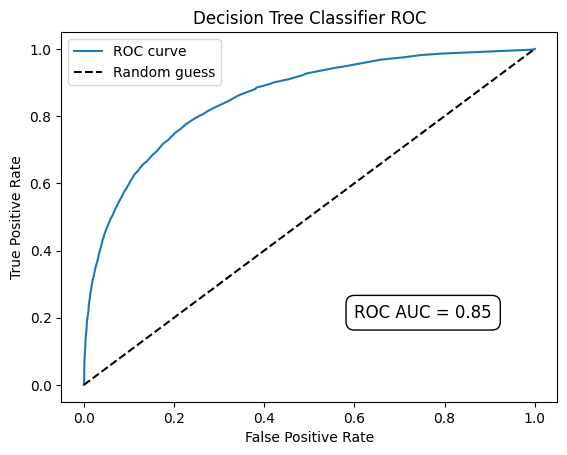

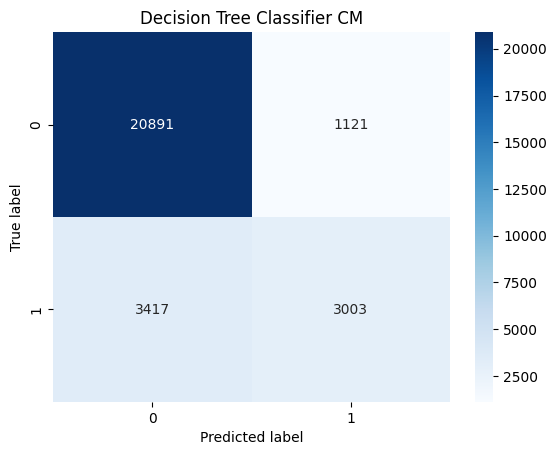

Model Evaluation:  Support Vector Machine
              precision    recall  f1-score   support

     no-Rain       0.87      0.96      0.91     22012
        Rain       0.79      0.52      0.63      6420

    accuracy                           0.86     28432
   macro avg       0.83      0.74      0.77     28432
weighted avg       0.85      0.86      0.85     28432



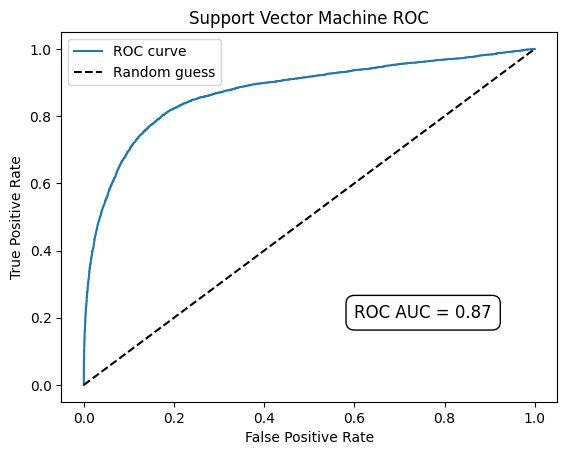

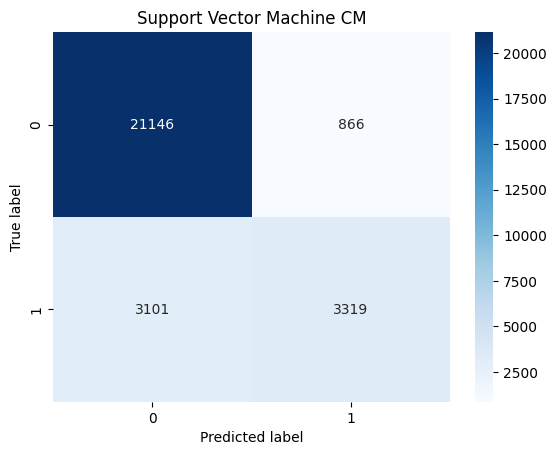

Model Evaluation:  Multilayer Perceptron
              precision    recall  f1-score   support

     no-Rain       0.89      0.94      0.91     22012
        Rain       0.74      0.59      0.66      6420

    accuracy                           0.86     28432
   macro avg       0.81      0.77      0.79     28432
weighted avg       0.85      0.86      0.86     28432



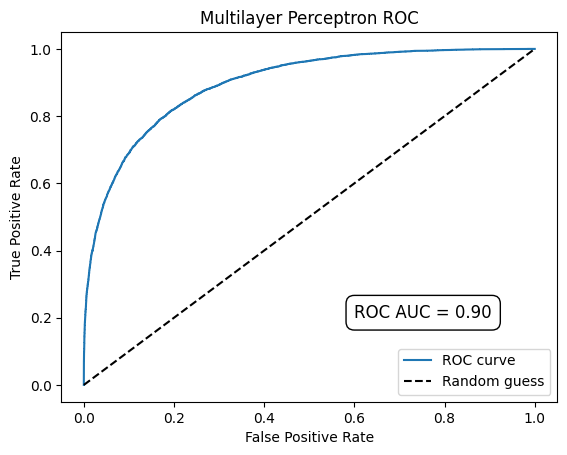

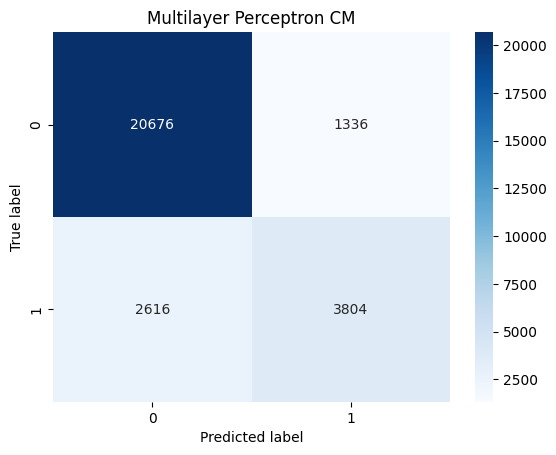

Model Evaluation:  Logistic Regression
              precision    recall  f1-score   support

     no-Rain       0.87      0.94      0.91     22012
        Rain       0.73      0.52      0.61      6420

    accuracy                           0.85     28432
   macro avg       0.80      0.73      0.76     28432
weighted avg       0.84      0.85      0.84     28432



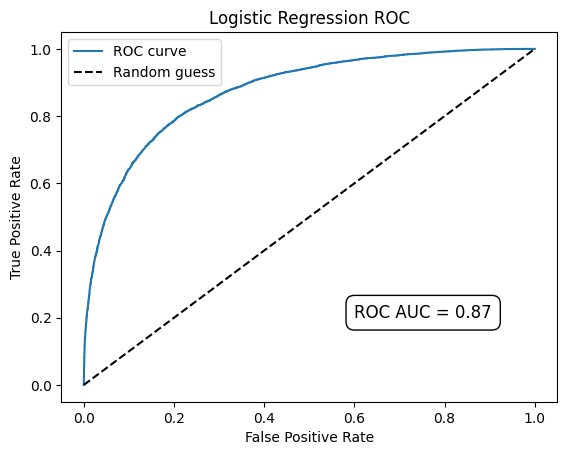

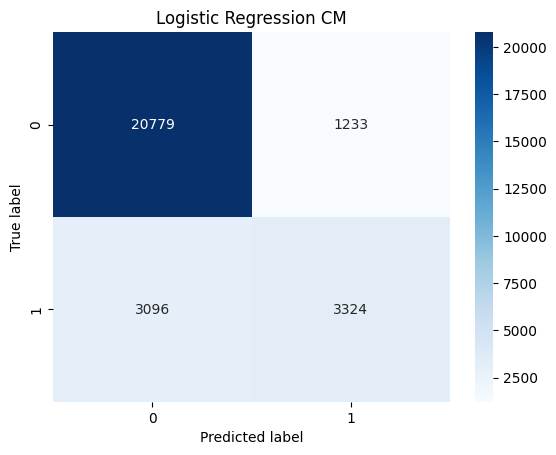

Model Evaluation:  Naive Bayes
              precision    recall  f1-score   support

     no-Rain       0.84      0.95      0.89     22012
        Rain       0.69      0.39      0.50      6420

    accuracy                           0.82     28432
   macro avg       0.77      0.67      0.70     28432
weighted avg       0.81      0.82      0.80     28432



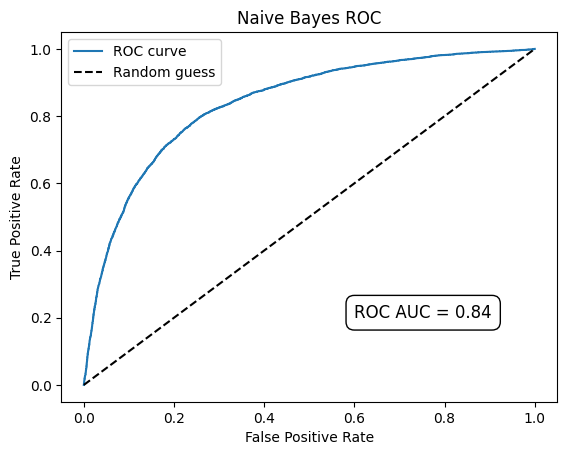

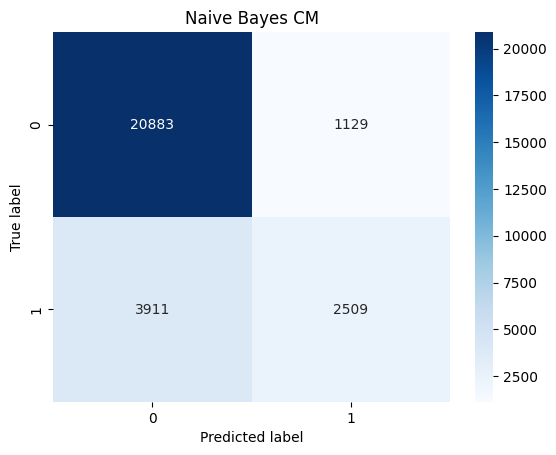

Model Evaluation:  Ensemble of Tree Classifiers (Boosting)
              precision    recall  f1-score   support

     no-Rain       0.88      0.95      0.91     22012
        Rain       0.76      0.57      0.65      6420

    accuracy                           0.86     28432
   macro avg       0.82      0.76      0.78     28432
weighted avg       0.86      0.86      0.86     28432



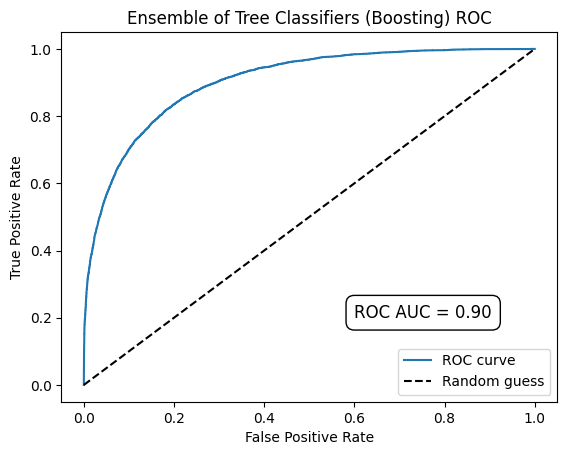

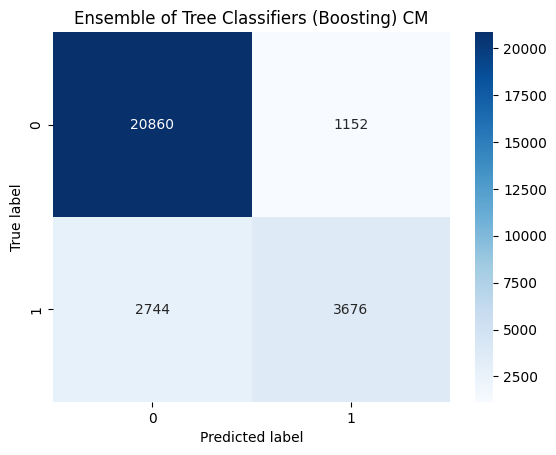

In [163]:
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
from sklearn.metrics import roc_auc_score

# list of 6 classifiers that were created throughout this project
classifiers = {'Decision Tree Classifier': tree_clf, 'Support Vector Machine': nonlinear_svm, 'Multilayer Perceptron':
parameters, 'Logistic Regression': LR, 'Naive Bayes': NB_classifier, 'Ensemble of Tree Classifiers (Boosting)': xgb_clf}

# iterate over the classifeirs
for name, clf in classifiers.items():
    print('Model Evaluation: ', name)

    ''' getting predections''' 

    # handling different test sets to evaluate different classifiers
    if name == 'Naive Bayes':
        X_test = X_test_selected_PCA
        y_test = y_test_og
    elif name == 'Multilayer Perceptron':
        X_test = X_test_transposed
        y_test = y_test_transposed
        y_test = y_test.flatten()
    else:
        X_test = X_test_og
        y_test = y_test_og
    
    # handling different predict functions on MLP
    if name == 'Multilayer Perceptron':
        predictions = predict(clf, X_test)
        y_scores = predict_proba(clf, X_test)
    else:
        predictions = clf.predict(X_test)
        y_scores = clf.predict_proba(X_test)
    
    ''' classification report'''
    
    report = classification_report(y_test, predictions, target_names=['no-Rain', 'Rain'])
    print(report)
    
    ''' ROC Curve '''

    # calculate probablities of target classes
    # calculating false positive rate, true positive rate, and thresholds to plot a ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

    # Visualize

    roc_auc = roc_auc_score(y_test, y_scores[:, 1])

    # initalizing X and Y axis with the variables
    plt.plot(fpr, tpr, label='ROC curve')
    # drawing a straight diagonal line to represent worst case (random guess)
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    #plt.text(0.6, 0.2, f'ROC AUC = {roc_auc:.2f}', fontsize=12)
    plt.text(0.6, 0.2, f'ROC AUC = {roc_auc:.2f}', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    # assigning labels to the plot
    plt.xlabel('False Positive Rate') # setting x-label
    plt.ylabel('True Positive Rate') # setting y-label
    plt.title(f'{name} ROC') # setting title
    plt.legend(loc='best') # setting legend
    plt.show() # display

    ''' confusion matrix'''

    # creating instance of confusion matrix on classifier predections
    cm = confusion_matrix(y_test, predictions)

    # Visualize

    # creating an sns heatmap
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f'{name} CM') # setting title
    plt.ylabel('True label') # setting y-label
    plt.xlabel('Predicted label') # setting x-label
    plt.show() # display        